In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x,y=make_blobs(  
    n_samples=100,  
    n_features=2
)  

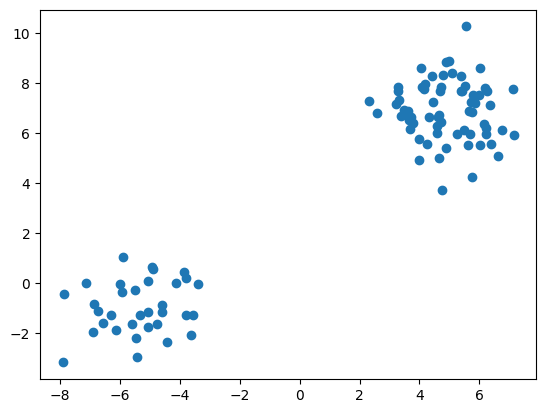

In [3]:
plt.scatter(x[:,0],x[:,1])

In [4]:
x=np.random.rand(600,2)
y=np.random.rand(600,2)

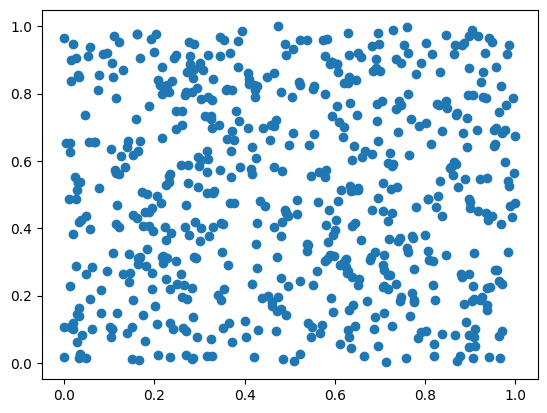

In [5]:
plt.scatter(x[:,0],x[:,1])

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=list()
for No_of_centroids in range(1,11):
    model=KMeans(n_clusters=No_of_centroids,init="k-means++")
    model.fit(x)
    wcss.append(model.inertia_)



In [8]:
wcss

[101.52557200641273,
 62.73272310647207,
 40.341770590282536,
 24.274983424614245,
 20.92332295568992,
 18.06665417404135,
 14.411943804347953,
 12.359037218530208,
 10.95484148133638,
 10.123965680588494]

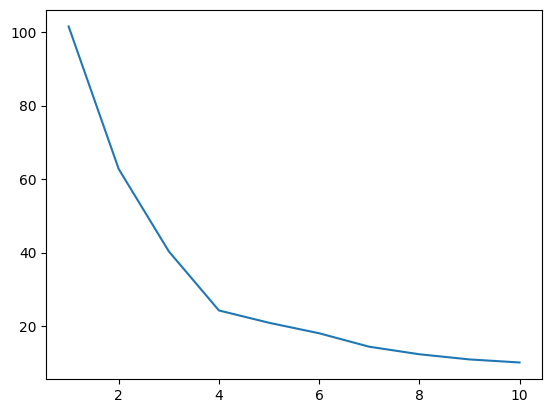

In [9]:
plt.plot(range(1,11),wcss)

In [10]:
from kneed import KneeLocator

In [11]:
k=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [12]:
k.elbow

4

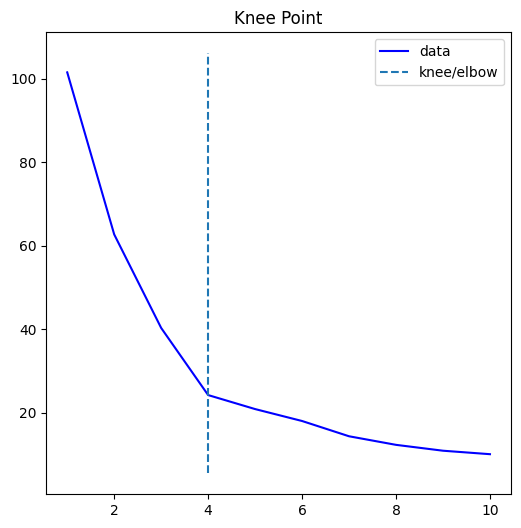

In [13]:
k.plot_knee()

In [14]:
model=KMeans(n_clusters=4,init="k-means++")
model.fit(x)

KMeans(n_clusters=4)

In [15]:
preds=model.labels_

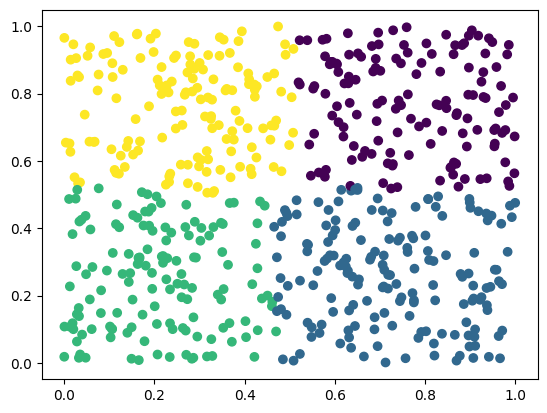

In [21]:
plt.scatter(x[:,0],x[:,1],c=preds)

In [22]:
from sklearn.metrics import silhouette_score

In [26]:
silhoute_score=list()
for k in range(2,12):
    model=KMeans(n_clusters=k,init="k-means++")
    model.fit(x)
    score=silhouette_score(x,labels=model.labels_)
    silhoute_score.append(score)

In [27]:
silhoute_score

[0.36163908583657595,
 0.37152711845565195,
 0.42324918380156884,
 0.3716073277974491,
 0.36844383152525545,
 0.352745725496093,
 0.3777807226953245,
 0.3733126020336425,
 0.3500625159990228,
 0.35354523397154747]

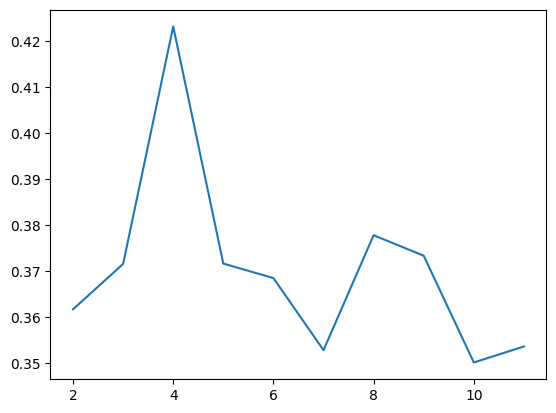

In [28]:
plt.plot(range(2,12),silhoute_score)

In [30]:
y_pred=model.predict(y)

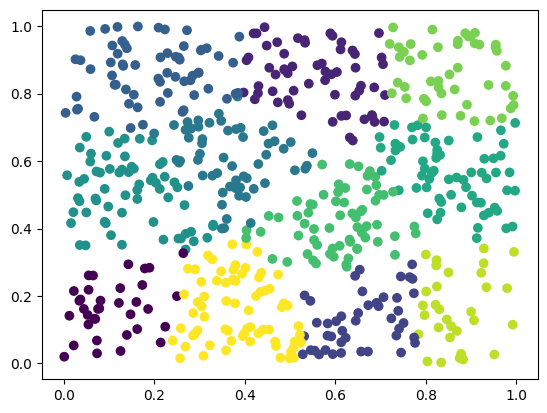

In [31]:
plt.scatter(y[:,0],y[:,1],c=y_pred)

# Hierarchical Clustering

In [34]:
import seaborn as sns

In [35]:
df=sns.load_dataset("iris")

In [36]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
df["species"]=df["species"].apply(lambda x:1 if x=="setosa" else (2 if x=="virginica" else 0))

In [38]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
from sklearn.decomposition import PCA

In [40]:
pca_model=PCA(n_components=2)

In [43]:
pca_scaled_model=pca_model.fit_transform(df.iloc[:,:-1])

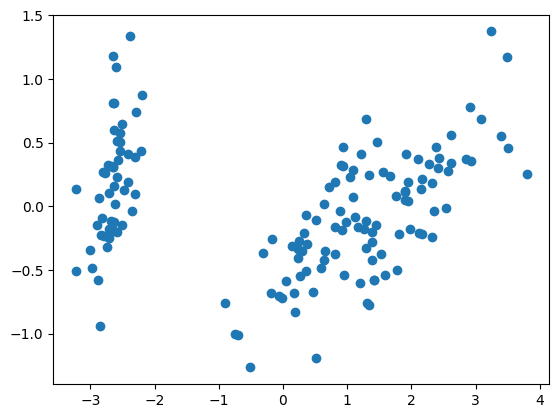

In [45]:
plt.scatter(pca_scaled_model[:,0],pca_scaled_model[:,1])

In [47]:
import scipy.cluster.hierarchy  as sc

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [51.25, 51.25, 97.5, 97.5],
  [12.5, 12.5, 74.375, 74.375],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [43.4375, 43.4375, 144.375, 144.375],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [192.5, 192.5, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [285.0, 285.0, 340

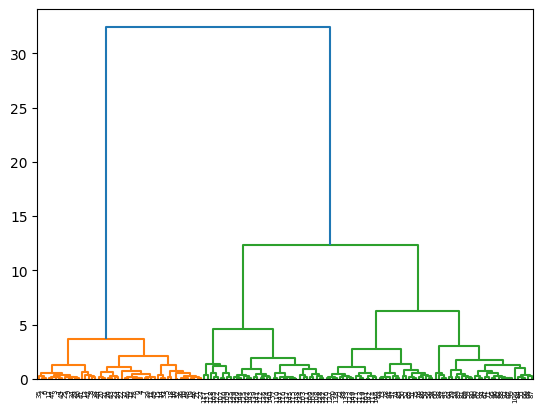

In [49]:
sc.dendrogram(sc.linkage(pca_scaled_model,metric='euclidean',method="ward"))

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
model=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage='ward')
model.fit(pca_scaled_model)

AgglomerativeClustering()

In [52]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

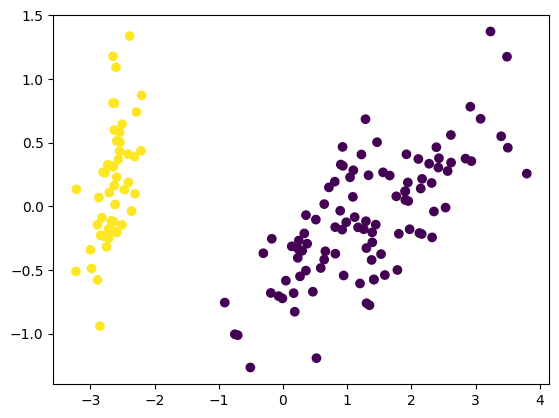

In [53]:
plt.scatter(pca_scaled_model[:,0],pca_scaled_model[:,1],c=model.labels_)

In [57]:
silhoutee_score=list()
for i in range(2,12):
    model=AgglomerativeClustering(n_clusters=i,metric="euclidean",linkage='ward')
    model.fit(pca_scaled_model)
    score=silhouette_score(pca_scaled_model,model.labels_)
    silhoutee_score.append(score)


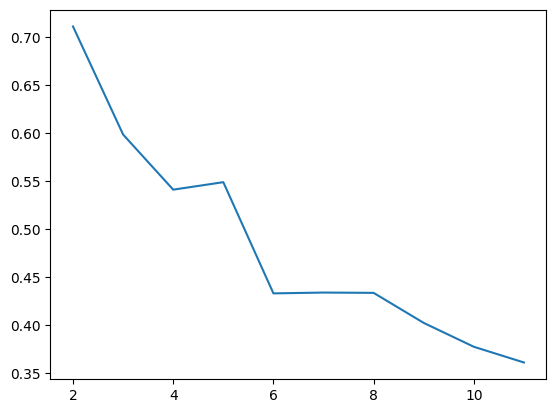

In [58]:
plt.plot(range(2,12),silhoutee_score)

# DB Scan

In [63]:
from sklearn.datasets import make_moons

In [70]:
x,y=make_moons(n_samples=100,random_state=5)

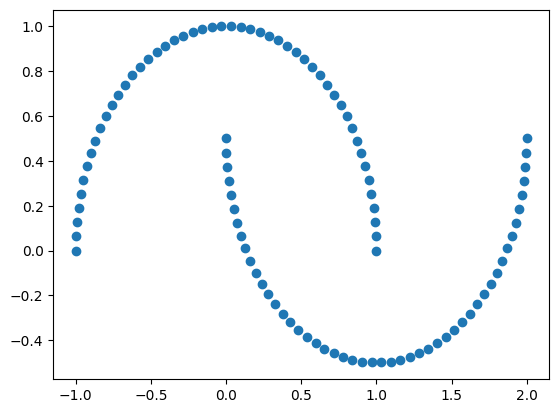

In [71]:
plt.scatter(x[:,0],x[:,1])

In [75]:
from sklearn.cluster import DBSCAN

In [77]:
model=DBSCAN(eps=0.5)

In [78]:
model.fit(x)

DBSCAN()

In [79]:
model.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

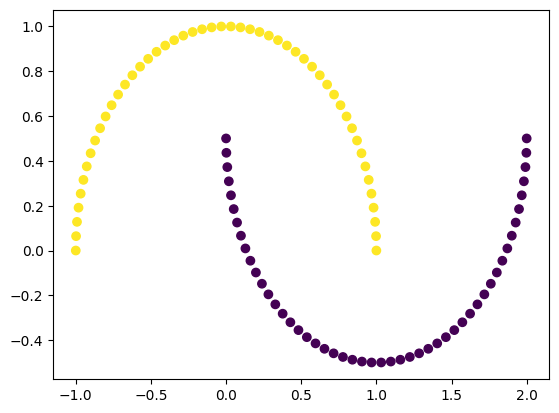

In [80]:
plt.scatter(x[:,0],x[:,1],c=model.labels_)